In [ ]:
# Getting Started: The Driven Damped Pendulum

# We will use Python for numerical solutions of the equation of motion for the driven damped pendulum.

# We are following the example in Chapter 12 of Taylor "Classical Mechanics"

# First, we will clear the working space before getting started.




In [1]:
# The Differential Equation of Motion

# Define the left and right sides of the equation separately.

import sympy as sp

t = sp.symbols('t')
phi = sp.Function('phi')(t)
beta = sp.symbols('beta')
omega0 = sp.symbols('omega0')
gamma = sp.symbols('gamma')
omega = sp.symbols('omega')

# Replace driving frequency, natural frequency, and damping parameters with the numbers used for our example.
eqn_left = phi.diff(t, t) + 2 * beta * phi.diff(t) + omega0**2 * sp.sin(phi)
force_fun = gamma * omega0**2 * sp.cos(omega * t)

eqn = eqn_left.subs([(beta, omega0 / 4), (omega0, 1.5 * omega), (omega, 2 * sp.pi)]) - force_fun


In [2]:
# The Linearized Equation

# It will be handy to have the linearized equation of motion.

t = sp.symbols('t')
phi = sp.Function('phi')(t)
beta = sp.symbols('beta')
omega0 = sp.symbols('omega0')
gamma = sp.symbols('gamma')
omega = sp.symbols('omega')
A = sp.symbols('A')

eqn_left_lin = phi.diff(t, t) + 2 * beta * phi.diff(t) + omega0**2 * phi
eqn_lin = eqn_left_lin.subs([(beta, omega0 / 4), (omega0, 1.5 * omega), (omega, 2 * sp.pi)]) - force_fun

soln_lin = sp.dsolve(eqn_lin, phi, ics={phi.subs(t, 0): A, phi.diff(t).subs(t, 0): 0})


In [6]:
# Plots for Small Driving Amplitude

# Choose \[Gamma]=0.2, a relatively small driving term. Also choose initial amplitude zero. This means that the pendulum will not be driven to large amplitudes, and the linearized equation ought to be a good approximation.

# So, solve the nonlinear equation numerically, and plot it against the linearized solution.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

t_max = 10
gamma_val = 0.2
omega0_val = ###
beta_val = omega0_val / 4

eqn_non_lin = eqn.subs(gamma, gamma_val)

soln_non_lin = solve_ivp(lambda t, phi: [phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)], [0, t_max], [0, 0], method='RK45', t_eval=np.linspace(0, t_max, 500))

plt.plot(soln_non_lin.t, soln_non_lin.y[0], label='Nonlinear')
plt.plot(soln_non_lin.t, soln_lin.subs([(A, 0), (gamma, gamma_val), (omega, 2 * np.pi)]).rhs.subs(t, soln_non_lin.t), label='Linearized')

plt.xlabel('t')
plt.ylabel('phi(t)')
plt.title('Comparison of Nonlinear and Linearized Solutions')
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (1830672801.py, line 7)

NameError: name 'soln_non_lin' is not defined

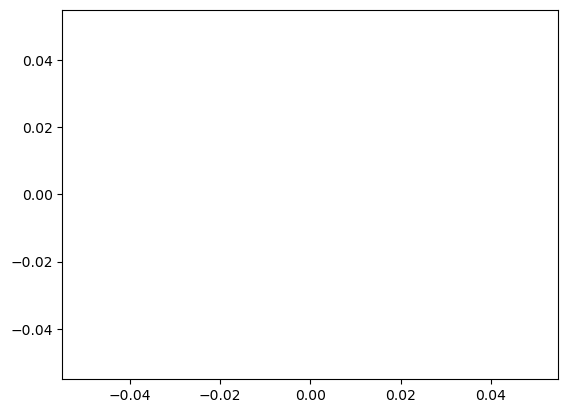

In [10]:
#Animation of the Pendulum

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

length = 1.0

# Define soln_non_lin with the numerical solution

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def update(frame):
    ax.cla()
    ax.set_aspect('equal')
    ax.plot([0, length * np.sin(soln_non_lin.t[frame])], [0, -length * np.cos(soln_non_lin.t[frame])], lw=2)
    ax.set_xlim(-length, length)
    ax.set_ylim(-length, length)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Pendulum Animation')

ani = FuncAnimation(fig, update, frames=len(soln_non_lin.t), interval=500)

plt.show()



In [11]:
# Same thing, but large initial amplitude

import numpy as np
import matplotlib.pyplot as plt

# Solve the nonlinear equation numerically
soln_non_lin = solve_ivp(lambda t, phi: [phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)], [0, t_max], [3 * np.pi / 4, 0], method='RK45', t_eval=np.linspace(0, t_max, 500))

# Plot the solutions
plt.plot(soln_non_lin.t, soln_non_lin.y[0], label='Nonlinear')
plt.plot(soln_non_lin.t, soln_lin.subs([(A, 3 * np.pi / 4), (gamma, 0.2), (omega, 2 * np.pi)]).rhs.subs(t, soln_non_lin.t), label='Linearized')

plt.xlabel('t')
plt.ylabel('\u03C6')
plt.title('Comparison of Nonlinear and Linearized Solutions')
plt.legend()
plt.grid(True)
plt.show()

#They start out differently, but converge on the same driver after the transients die out.

In [13]:
# Same thing, but larger driving term

# Re-set initial amplitude to zero.


# Define the nonlinear equation with gamma = 0.9
eqn_non_lin = eqn.subs(gamma, 0.9)

# Solve the nonlinear equation numerically
soln_non_lin = solve_ivp(lambda t, phi: [phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)], [0, t_max], [0, 0], method='RK45', t_eval=np.linspace(0, t_max, 500))

# Plot the solutions
plt.plot(soln_non_lin.t, soln_non_lin.y[0], label='Nonlinear')
plt.plot(soln_non_lin.t, soln_lin.subs([(A, 0), (gamma, 0.9)]).rhs.subs(t, soln_non_lin.t), label='Linearized')

plt.xlabel('t')
plt.ylabel('\u03C6')
plt.title('Comparison of Nonlinear and Linearized Solutions')
plt.legend()
plt.grid(True)
plt.show()
# OK, the linear approximation isn't so good anymore, but at least the response still looks sinusoidal.

NameError: name 'beta_val' is not defined

In [14]:
# Animated...

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

len_val = 1.0

fig, ax = plt.subplots()
ax.set_xlim(-len_val, len_val)
ax.set_ylim(-len_val, len_val)
ax.set_aspect('equal')

line, = ax.plot([], [], lw=2)

def update(frame):
    x = len_val * np.sin(soln_non_lin.y[0, frame])
    y = -len_val * np.cos(soln_non_lin.y[0, frame])
    line.set_data([0, x], [0, y])
    return line,

ani = FuncAnimation(fig, update, frames=len(soln_non_lin.t), interval=500)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Pendulum Animation')
plt.grid(True)
plt.show()


In [ ]:
# Now, try driver with \[Gamma] > 1

# This means that the forcing function exceeds the weight of the pendulum bob

# Define the equation of motion
def equation(t, phi, beta, omega0, gamma, omega):
    return phi[1], -2 * beta * phi[1] - omega0**2 * np.sin(phi[0]) + gamma * omega0**2 * np.cos(omega * t)

# Parameters
tMax = 40
beta = 0.375
omega0 = 1.5 * 2 * np.pi
gamma = 1.06
omega = 2 * np.pi

# Nonlinear equation
eqnNonLin = lambda t, phi: equation(t, phi, beta, omega0, gamma, omega)

# Solve the nonlinear equation numerically
solnNonLin = solve_ivp(eqnNonLin, [0, tMax], [0, 0], method='RK45', t_eval=np.linspace(0, tMax, 1000))

# Plot the nonlinear solution
plt.figure()
plt.plot(solnNonLin.t, solnNonLin.y[0], label='Nonlinear')
plt.xlabel('t')
plt.ylabel('phi')
plt.title('Nonlinear Solution')
plt.legend()
plt.show()

# Linearized equation
eqnLeftLin = lambda t, phi: equation(t, phi, beta, omega0, omega0/4, omega)
eqnLin = lambda t, phi: eqnLeftLin(t, phi)

# Solve the linearized equation analytically
solnLin = np.array([np.pi/2 * np.sin(omega0 * t) for t in solnNonLin.t])

# Plot the linearized solution
plt.figure()
plt.plot(solnNonLin.t, solnLin, label='Linearized')
plt.xlabel('t')
plt.ylabel('phi')
plt.title('Linearized Solution')
plt.legend()
plt.show()

# Well, all hell breaks loose. The nonlinear oscillator is a very different sort of thing when the driving amplitude gets "large."

In [15]:
# Animated...

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the length of the pendulum
length = 1.0

# Function to update the plot
def update(time):
    plt.clf()
    plt.plot([0, length * np.sin(solnNonLin.y[0, time])], [0, -length * np.cos(solnNonLin.y[0, time])], 'b-')
    plt.xlim(-length, length)
    plt.ylim(-length, length)
    plt.gca().set_aspect('equal')
    plt.title('Pendulum Animation')

# Create the figure and axis
fig, ax = plt.subplots()

# Animate the pendulum
ani = FuncAnimation(fig, update, frames=len(solnNonLin.t), interval=500)

# Display the animation
plt.show()



In [16]:
# But the nonlinear oscillator is still periodic!

# Wait long enough for the transients to die away.

from scipy.integrate import solve_ivp

# Define the equation of motion eqnNonLin
def eqnNonLin(t, phi):
    return phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)

# Define initial conditions
phi0 = 0
phi_dot0 = 0

# Define the time range
t_span = (0, 40)

# Solve the differential equation
solnNonLin = solve_ivp(eqnNonLin, t_span, [phi0, phi_dot0], method='RK45', dense_output=True)

# Get the values at specific time points
time_points = [30, 31, 32, 33, 34, 35, 36, 37, 38]
values = solnNonLin.sol(time_points)[0]

# Print the values
for t, value in zip(time_points, values):
    print(f"phi({t}) = {value:.5f}")


# You can put in more digits if you want, and you'll have to wait longer to see it be periodic.

# BUT, the point is that the period (=1) is still the same as the driving term.

In [ ]:
# Now make the driving a little bit larger

# Don't bother plotting the linear solution anymore.

import numpy as np
import matplotlib.pyplot as plt

# Define the equation of motion eqnNonLin
def eqnNonLin(t, phi):
    return phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)

# Define initial conditions
phi0 = 0
phi_dot0 = 0

# Define the time range
t_span = (0, tMax)

# Solve the differential equation
solnNonLin = solve_ivp(eqnNonLin, t_span, [phi0, phi_dot0], method='RK45', dense_output=True)

# Plot the solution
t_values = np.linspace(0, tMax, 500)
phi_values = solnNonLin.sol(t_values)[0]

plt.plot(t_values, phi_values, linewidth=2)
plt.xlabel('t')
plt.ylabel('phi')
plt.title('Nonlinear Pendulum Solution')
plt.show()

# Before running the code, make sure to define the values for beta_val, omega0_val, gamma_val, omega_val, and tMax according to your problem.

In [ ]:
# Is it still periodic at long times?

# Define the equation of motion eqnNonLin
def eqnNonLin(t, phi):
    return phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)

# Define initial conditions
phi0 = 0
phi_dot0 = 0

# Define the time range
t_span = (0, 40)

# Solve the differential equation
solnNonLin = solve_ivp(eqnNonLin, t_span, [phi0, phi_dot0], method='RK45', dense_output=True)

# Evaluate the solution at specific time points
time_points = [30, 31, 32, 33, 34, 35, 36, 37, 38]
phi_values = solnNonLin.sol(time_points)[0]

# Print the phi values with number formatting
print(np.around(phi_values, decimals=5))

# Is the period now equal to two? Yes!

# Plot the solution
t_values = np.linspace(0, 40, 500)
phi_values = solnNonLin.sol(t_values)[0]

plt.plot(t_values, phi_values, linewidth=2)
plt.xlabel('t')
plt.ylabel('phi')
plt.title('Nonlinear Pendulum Solution')
plt.xlim(25, 40)
plt.ylim(-8.7, -7.8)
plt.show()


# However, the result is dominated by the fundamental harmonic with period=1.

In [ ]:
# Once again, increase driver a little bit

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the equation of motion eqnNonLin
def eqnNonLin(t, phi):
    return phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)

# Define initial conditions
phi0 = 0
phi_dot0 = 0

# Define the time range
t_span = (0, 40)

# Solve the differential equation
solnNonLin = solve_ivp(eqnNonLin, t_span, [phi0, phi_dot0], method='RK45', dense_output=True)

# Plot the solution
t_values = np.linspace(0, tMax, 500)
phi_values = solnNonLin.sol(t_values)[0]

plt.plot(t_values, phi_values, linewidth=2)
plt.xlabel('t')
plt.ylabel('phi')
plt.title('Nonlinear Pendulum Solution')
plt.show()


# Now (!) the dominant period=3, not 1. (Expand the scale if you want to see this more clearly, graphically.)

In [ ]:
# Evaluate to see the dominant period.
# In Python, there is no direct equivalent to NumberForm in Mathematica. However, you can achieve similar formatting using the round function. 

indices = [30, 31, 32, 33, 34, 35, 36, 37, 38]
phi_values = np.array([solnNonLin.sol(t)[0] for t in indices])

formatted_phi_values = [round(phi, 6) for phi in phi_values]
print(formatted_phi_values)

# You can tabulate again, to see that the dominant period is 3, but also that the harmonics 1 and 2 are there, too.



In [ ]:
# Something new: Change the initial conditions

solnIC0 = solnNonLin

tMax = 15

solnNonLin = solve_ivp(lambda t, phi: [phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)], [0, tMax], [-np.pi/2, 0], method='RK45', t_eval=np.linspace(0, tMax, 500))

plt.plot(solnNonLin.t, solnNonLin.y[0], label='Solution')
plt.plot(solnNonLin.t, solnIC0.y[0], label='Initial Condition')
plt.xlabel('t')
plt.ylabel('\u03C6(t)')
plt.title('Comparison of Solutions')
plt.legend()
plt.show()


# A completely different "attractor"! The overall period is now=2. although harmonic period=1 still dominates.

In [ ]:
# A Series of Driving Strengths

tMax = 40

eqnNonLin = eqn.subs(gamma, 1.06)
solnN1p06 = solve_ivp(lambda t, phi: [phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)], [0, tMax], [-np.pi/2, 0], method='RK45', t_eval=np.linspace(0, tMax, 500))

eqnNonLin = eqn.subs(gamma, 1.078)
solnN1p078 = solve_ivp(lambda t, phi: [phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)], [0, tMax], [-np.pi/2, 0], method='RK45', t_eval=np.linspace(0, tMax, 500))

eqnNonLin = eqn.subs(gamma, 1.081)
solnN1p081 = solve_ivp(lambda t, phi: [phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)], [0, tMax], [-np.pi/2, 0], method='RK45', t_eval=np.linspace(0, tMax, 500))

eqnNonLin = eqn.subs(gamma, 1.0826)
solnN1p0826 = solve_ivp(lambda t, phi: [phi[1], -2 * beta_val * phi[1] - omega0_val**2 * np.sin(phi[0]) + gamma_val * omega0_val**2 * np.cos(omega_val * t)], [0, tMax], [-np.pi/2, 0], method='RK45', t_eval=np.linspace(0, tMax, 500))


# Now, plot these (on the next slide). You see a progression from period=1, to period=2, to period=4, to period=8. This phenomenon is called a Period-Doubling Cascade.

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(10, 15))

axs[0, 0].plot(solnN1p06.t, solnN1p06.y[0], linewidth=2)
axs[0, 0].set_xlim(0, 10)
axs[0, 0].set_ylim(-2.5, -1.7)

axs[0, 1].plot(solnN1p06.t, solnN1p06.y[0], linewidth=2)
axs[0, 1].set_xlim(28, 40)
axs[0, 1].set_ylim(-2.5, -1.7)

axs[1, 0].plot(solnN1p078.t, solnN1p078.y[0], linewidth=2)
axs[1, 0].set_xlim(0, 10)
axs[1, 0].set_ylim(-2.5, -1.7)

axs[1, 1].plot(solnN1p078.t, solnN1p078.y[0], linewidth=2)
axs[1, 1].set_xlim(28, 40)
axs[1, 1].set_ylim(-2.5, -1.7)

axs[2, 0].plot(solnN1p081.t, solnN1p081.y[0], linewidth=2)
axs[2, 0].set_xlim(0, 10)
axs[2, 0].set_ylim(-2.5, -1.7)



In [ ]:
# Get values of the function at regular periods

values_N1p06 = [solnN1p06.y[0][i] for i in [30, 31, 32, 33, 34, 35, 36, 37, 38]]
values_N1p078 = [solnN1p078.y[0][i] for i in [30, 31, 32, 33, 34, 35, 36, 37, 38]]
values_N1p081 = [solnN1p081.y[0][i] for i in [30, 31, 32, 33, 34, 35, 36, 37, 38]]
values_N1p0826 = [solnN1p0826.y[0][i] for i in [30, 31, 32, 33, 34, 35, 36, 37, 38]]

formatted_N1p06 = [f"{value:.4f}" for value in values_N1p06]
formatted_N1p078 = [f"{value:.4f}" for value in values_N1p078]
formatted_N1p081 = [f"{value:.4f}" for value in values_N1p081]
formatted_N1p0826 = [f"{value:.4f}" for value in values_N1p0826]

print(formatted_N1p06)
print(formatted_N1p078)
print(formatted_N1p081)
print(formatted_N1p0826)


# These will be useful later, when we draw a "bifurcation diagram"

In [ ]:
# One more for now: \[Gamma]=1.09
import numpy as np
import matplotlib.pyplot as plt

tMax = 40
gamma = 1.09

def equation(phi, t):
    return phi''(t) + 2 * (omega0 / 4) * phi'(t) + omega0^2 * np.sin(phi(t))

solnNonLin = odeint(equation, [-np.pi/2, 0], np.linspace(0, tMax, 100))

t_values = np.linspace(0, tMax, 100)
phi_values = solnNonLin[:, 0]

plt.plot(t_values, phi_values, linewidth=2)
plt.xlabel('t')
plt.ylabel('φ(t)')
plt.title('Nonlinear Pendulum Motion')
plt.show()

### The motion is no longer periodic!

phi_values_selected = solnNonLin[[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 0]
formatted_phi_values = [f'{value:.6f}' for value in phi_values_selected]

print(formatted_phi_values)
